# 一、最小二乘法


## 1.一元线性拟合的最小二乘法

先选取最为简单的一元线性函数拟合助于我们理解最小二乘法的原理。

![图片1](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95.jpg?raw=true)

  要让一条直接最好的拟合红色的数据点，那么我们希望每个点到直线的残差都最小。
设拟合直线为 $y_{i}= b+ax_{i}$,那这些数据的所有误差和为：$S=\sum_{i=1}^{n}(y-b-ax_{i})^2$
因此，为了能得到最小的误差所对应的$b,a$的值，需要分别对$S$关于$b,a$求导，并且令导数为0：

$${\frac{\partial S}{\partial b}}= -2\sum_{i=1}^{n}(y_{i}-b-ax_{i})=0$$

$${\frac{\partial S}{\partial a}}= -2\sum_{i=1}^{n}(y_{i}-b-ax_{i})x_{i}=0$$
解得：
$$a= \frac{ n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{n\sum x_{i}^2-(\sum x_{i})^2}$$


$$b=\overline{y}-a\overline{x}$$

### 具体推导过程：
$${\frac{\partial S}{\partial b}}= -2\sum_{i=1}^{n}(y_{i}-b-ax_{i})=0$$

$${\frac{\partial S}{\partial a}}= -2\sum_{i=1}^{n}(y_{i}-b-ax_{i})x_{i}=0$$

令$\frac{\partial D}{\partial a}=0$,$\frac{\partial D}{\partial a}$,求解a和b,令$n\bar{x}=\sum_{i=1}^nx_i,n\bar{y}=\sum_{i=1}^ny_i$
因此得：
$$n\bar{y}-na-bn\bar{x}=0$$

$$\sum_{i=1}^nx_iy_i-a\sum_{i=1}^nx_i-b\sum_{i=1}^nx_i^2=0$$

得：

$$b=\bar{y}-a\bar{x}$$

$$\sum_{i=1}^nx_iy_i-\bar{y}\sum_{i=1}^nx_i+b\bar{x}\sum_{i=1}^nx_i^2=0$$

最终得
$$b=\bar{y}-a\bar{x}$$

$$a=\frac{\sum_{i=1}^nx_iy_i-\bar{y}\sum_{i=1}^nx_i}{\sum_{i=1}^nx_i^2-\bar{x}\sum_{i=1}^nx_i}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})^2}{\sum_{i=1}^n(x_i-\bar{x})^2}$$ (求和性质)

 求和性质：具体可以参考Introductory Econometrics A Modern Approach (Fourth Edition) 一书（计量经济学导论，第4版，杰弗里·M·伍德里奇 著）的附录A。
 
求和性质证明：
（1）$$\sum_{i=1}^n(x_i-\bar{x})^2=\sum_{i=1}^n(x_i^2-2x_i\bar{x}+\bar{x}^2)$$

$$=\sum_{i=1}^nx_i^2-2\bar{x}\sum_{i=1}^nx_i+\sum_{i=1}^n\bar{x}^2$$

$$=\sum_{i=1}^n-2n\bar{x}^2+n\bar{x}^2$$

$$=\sum_{i=1}^nx_i^2-n\bar{x}^2=\sum_{i=1}^nx_i^2-\bar{x}\sum_{i=1}^nx_i$$ （分母得证）

(2)$$\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$$

$$=\sum_{i=1}^n(x_iy_i-x_i\bar{y}-\bar{x}y_i+\bar{x}\bar{y})$$

$$=\sum_{i=1}^nx_iy_i-\sum_{i=1}^nx_i\bar{y}-\sum_{i=1}^n\bar{x}y_i+\sum_{i=1}^n\bar{x}\bar{y}$$

$$=\sum_{i=1}^nx_iy_i-n\bar{x}\bar{y}-n\bar{x}\bar{y}+n\bar{x}\bar{y}$$

$$=\sum_{i=1}^nx_iy_i-\bar{y}\sum_{i=1}^nx_i$$     (分子得证)


将算法转化为python语言：

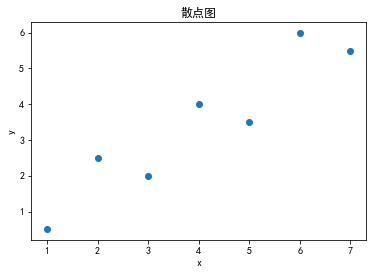

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
"""
一元线性拟合
采用的拟合数据为xi=1,2,3,4,5,6,7
对应的相应函数值yi=0.5,2.5,2.4,3.5,6,5.5
"""
x=[1,2,3,4,5,6,7]
y=[0.5,2.5,2,4,3.5,6,5.5]

"""
离散点图像绘制
"""
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.title("散点图")
plt.show()

In [13]:
"""
计算拟合曲线参数a,b
"""
size = len(x)
sum_x=0
sum_y=0
average_x=0
average_y=0
sum_xy=0
sum_sqare_x=0
b=0
for i in range(size):
    sum_x+=x[i]
    sum_y+=y[i]
    sum_xy+=x[i]*y[i]
    sum_sqare_x+=pow(x[i],2)  
average_x=sum_x/size
average_y=sum_y/size
a= (sum_xy-average_y*sum_x)/(sum_sqare_x-average_x*sum_x)
b=(average_y-a*average_x)
print("a=",a)
print("b=",b)
    


a= 0.8392857142857143
b= 0.07142857142857117


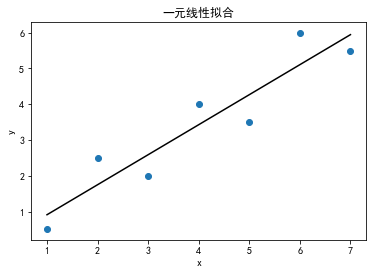

In [10]:
"""
绘制拟合曲线
"""
data_new_y=[]
i = 0
plt.scatter(x,y,label='sin')
plt.title("一元线性拟合")
plt.xlabel("x")
plt.ylabel("y")
for i in range(size):
    data_new_y.append(a*x[i]+b)
   
plt.plot(x,data_new_y,color='black')
plt.show()


# 2.多元线性拟合的最小二乘法


  在预测中，可能结果受到多个变量的影响，那么我们的拟合曲线就由$y=a_{0}+a_{1}x$转变为$y=B_{0}+B_{1}x^{(1)}+B_{2}x^{(2)}+...+B_{m}x^{(m)}$
  
  (x的上标代表变量的编号而不是次方)
  
  对于多变量，可以引入线性方程组和矩阵的概念得到最优解。
  
  列出线性方程组：
   $$ B_{0}+B_{1}x_{1}^1+...+B_{m}x_{1}^m=y_{1}$$
   
   $$ B_{0}+B_{1}x_{2}^1+...+B_{m}x_{2}^m=y_{2}$$
 
   $$ B_{0}+B_{1}x_{i}^1+...+B_{m}x_{i}^m=y_{i}$$
     
   $$ B_{0}+B_{1}x_{n}^1+...+B_{m}x_{n}^m=y_{n}$$
   
   上式记为矩阵形式为：
   
$$ \left[ \begin{array} {cccc}
1&x_1^1&\dots &x_n^1\\
1&x_1^2&\dots &x_n^1\\
\dots&\dots&\dots &\dots\\
1&x_n^m&\dots &x_n^m\\
\end{array} \right]  \left[ \begin{array} {cccc}
B_0\\
B_1\\
\dots\\
B_m\\
\end{array} \right]=\left[ \begin{array} {cccc}
y_1\\
y_2\\
\dots\\
y_n\\
\end{array} \right] $$

可以简化为：

$$A\cdot B=Y$$

最小二乘形式：

$$\min \left \| AB-Y \right \|^2$$

得到最终的最优解为：

$$\hat B = (A^{T}A)^{-1}A^{T}Y$$

### 具体推导过程：
多变量线性回归代价函数为：
$$J(\theta_0,\theta_1,\dots,\theta_n)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)}-y^{(i)}))^2$$
其中：
$$h_\theta(x)=\theta^TX=\theta_0x_0+\theta_1x1+\dots+\theta_nx_n$$

正规方程式通过求解下面的方程来找出使得代价函数最小的参数：
$$\frac{\partial }{\partial \theta_j}j(\theta_j)=0$$

设有m个训练实例，每个实例有n个特征，则训练实例集为：
$$X=\begin{bmatrix}
x_0^{1} & \dots &x_n^{1} \\ 
\dots & \dots & \dots\\ 
 x_0^{m}& \dots  & x_n^{m}
\end{bmatrix}$$

其中$x_j^{(i)}$表示第i个实例第j个特征

参数特征为：$$\theta=[\theta_0,\theta_1,\dots,\theta_n]^T$$

故代价函数为：
$$J(\theta_0,\theta_1,\dots,\theta_n)=\frac{1}{2m}(X*\theta-Y)^T(X*\theta-Y)=\frac{1}{2m}(Y^TY-Y^TX\theta-\theta^TX^TY+\theta^TX^TX\theta)$$

进行求导，等价于如下的形式：
$$\frac{1}{2m}(\frac{\partial Y^TY}{\partial \theta}-\frac{\partial Y^TX\theta}{\partial \theta}-\frac{\partial \theta^TX^TY}{\partial \theta}+\frac{\partial \theta^TX^TX\theta}{\partial \theta})$$

* 其中第一项：
$$\frac{\partial Y^TY}{\partial \theta}=0$$

* 第二项
$$Y^TX\theta=[y^{(1)},y^{(2)},\dots,y^{(m)}]X=\begin{bmatrix}
x_0^{1} & \dots &x_n^{1} \\ 
\dots & \dots & \dots\\ 
 x_0^{m}& \dots  & x_n^{m}
\end{bmatrix}[\theta_0,\theta_1,\dots,\theta_n]^T=(x_0^{(1)}y^{(1)}+\dots+x_0^{(m)}y^{(m)})\theta_0+(x_1^{(1)}y^{(1)}+\dots+x_1^{(m)}y^{(m)})\theta_1+\dots+(x_n^{(1)}y^{(1)}+\dots+x_n^{(m)}y^{(m)})\theta_n$$

该矩阵求导，有：
$$\frac{\partial Y^TX\theta}{\partial \theta}=\begin{bmatrix}
\frac{\partial Y^TX\theta}{\partial \theta_0}\\ 
\dots\\ 
\frac{\partial Y^TX\theta}{\partial \theta_n}
\end{bmatrix}=\begin{bmatrix}
x_0^{(1)}y^{(1)}+\dots+x_0^{(m)}y^{(m)}\\ 
\dots \\ 
x_n^{(1)}y^{(1)}+\dots+x_n^{(m)}y^{(m)}
\end{bmatrix}=X^TY$$

* 第三项：
$$\theta^TX^TY=[\theta_0,\theta_1,\dots,\theta_n]\begin{bmatrix}
x_0^{(1)} &\dots  &x_n^{(1)} \\ 
\dots & \dots &\dots \\ 
x_0^{(m)} & \dots & x_n^{(m)}
\end{bmatrix}[y^{(1)},y^{(2)},\dots,y^{(m)}]^T=(x_0^{(1)}\theta_0+\dots+x_n^{(1)}\theta_n)y^{(1)}+(x_0^{(2)}\theta_0+\dots+x_n^{(2)}\theta_n)y^{(2)}+\dots+(x_0^{(m)}\theta_0+\dots+x_n^{(m)}\theta_n)y^{(m)}$$

求导得：
$$\frac{\partial \theta^TX^TY}{\partial \theta}=\begin{bmatrix}
\frac{\partial \theta^TX^TY}{\partial \theta_0}\\ 
\dots\\ 
\frac{\partial \theta^TX^TY}{\partial \theta_n}
\end{bmatrix}=\begin{bmatrix}
x_0^{(1)}y^{(1)}+\dots+x_0^{(m)}y^{(m)}\\ 
\dots\\ 
x_n^{(1)}y^{(1)}+\dots+x_n^{(m)}y^{(m)}
\end{bmatrix}=X^TY$$

* 第四项：
$$\theta^TX^TX=(X^TX)(\theta_0^{(2)}+\theta_1^{(2)}+\dots+\theta_n^{(2)})$$

其中$\theta^TX^TX$为标量，可看成一个常数

故求导得：
$$\frac{\partial \theta^TX^TX\theta}{\partial \theta}=\begin{bmatrix}
\frac{\partial \theta^TX^TX\theta}{\partial \theta_0}\\ 
\dots \\ 
\frac{\partial \theta^TX^TX\theta}{\partial \theta_n}
\end{bmatrix}=2(X^TX)\begin{bmatrix}
\theta_0\\ 
\dots\\ 
\theta_n
\end{bmatrix}=2X^TX\theta$$

综上，正规方程为：
$$\frac{1}{2m}(-2X^TY+2X^TX\theta)=0$$

最终可得特征参数的表示为：
$$\theta = (X^TX)^{-1}X^TY$$
算法转化为Python语言：

In [6]:
from numpy.linalg import inv
from numpy import dot,transpose
x=[[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y=[[7],[9],[13],[17.5],[18]]
print(dot(inv(dot(transpose(x),x)),dot(transpose(x),y)))



[[1.1875    ]
 [1.01041667]
 [0.39583333]]


这样就得到了需要拟合多元直线的参数向量。

# 二、梯度下降算法



梯度下降算法(批量梯度下降)也适用于求线性回归的拟合曲线，我们设拟合的曲线为：

$$h_{\theta}(x)=\theta_{0}+\theta_{1}x_{1}+\theta_2x_2$$

那么我们的误差函数设为：$ J(\theta)= \frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{i})-y^{i})^2 $,要求误差函数的极小值，我们引入了梯度下降算法的概念。


梯度下降原理：将函数比作一座山，我们站在某个山坡上，往四周看，从哪个方向向下走一小步，能够下降的最快。

![20170617204230970.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D.png?raw=true)

由之前所述，求θ系数的问题演变成了求J(θ)的极小值问题，这里使用梯度下降法。而梯度下降法中的梯度方向由J(θ)对θ的偏导数确定，由于求的是极小值，因此梯度方向是偏导数的反方向。
$$\frac{\partial }{\partial \theta_i}J(\theta)=\frac{\partial }{\partial \theta_i}\frac{1}{2}(h_\theta(x)-y)^2$$

$$=2*\frac{1}{2}(h_\theta(x)-y)\frac{\partial }{\partial \theta_i}(h_\theta(x)-y)$$

$$=(h_\theta(x)-y)\frac{\partial }{\partial \theta_i}(\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_nx_n-y)$$
(除了$\theta_ix_i$项，其余项均为无关项)

所以，上式为：
$$=(h_\theta(x)-y)\frac{\partial }{\partial \theta_i}\theta_ix_i$$
$$=(h_\theta(x)-y)x_i$$

代入公式，最后可以得出关于$\theta$的表达式：
$$\theta_i=\theta_i-\alpha(h_\theta(x)-y)x_i$$
$$=\theta_i-\alpha \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_i^{(i)}$$





使用梯度下降算法的步骤：

1）对θ赋初始值，这个值可以是随机的，也可以让θ是一个全零的向量。

2）改变θ的值，使得目标损失函数J(θ)按梯度下降的方向进行减少。$\theta=\theta-\alpha\frac{\partial J(\theta)}{\partial \theta} $

其中$\alpha$为学习率或步长，需要人为指定，若过大会导致震荡即不收敛，若过小收敛速度会很慢。

3）当下降的高度小于某个定义的值，则停止下降。

python语言实现：

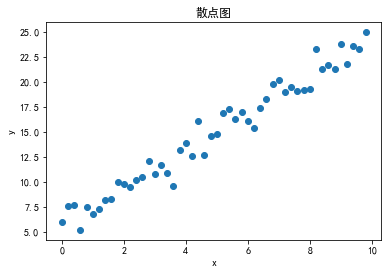

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# 构造训练数据
x = np.arange(0,10,0.2)
m=len(x)
x0 = np.full(m,1)
input_data = np.vstack([x0,x]).T
y= 2*x+5+np.random.randn(m)
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.title("散点图")
plt.show()

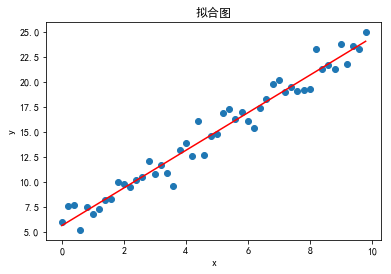

In [17]:
#设置终止条件
loop_max = 10000
epsilon = 1e-3

count = 0 #循环次数
finish = 0 #终止次数
#初始权值theta
theta = np.random.randn(2)
error = np.zeros(2)
alpha = 0.001 # 学习速率
while count < loop_max:
    count +=1
    sum_m = np.zeros(2)
    for i in range(m):
        dif = (np.dot(theta,input_data[i])-y[i])*input_data[i]
        sum_m = sum_m + dif # 当alpha取值过大时，sum_m会在迭代过程中溢出
    theta = theta - alpha * sum_m #当alpha取值过大时，会导致振荡
    
    #判断是否已经收敛
    if np.linalg.norm(theta-error) < epsilon:
        finish = 1
        break
    else:
        error = theta

plt.scatter(x,y)
plt.plot(x,theta[1]*x+theta[0],'red')
plt.xlabel("x")
plt.ylabel("y")
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.title("拟合图")
plt.show()

# 三、最小二乘法和梯度下降的区别

![3.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95%E5%92%8C%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E7%9A%84%E5%8C%BA%E5%88%AB.png?raw=true)


* 1.最小二乘法不需要选择学习速率

* 2.最小二乘法不需要进行迭代

* 3.最小二乘法时间复杂度更高，在数据量较大的情况下速度比梯度下降慢

##  总结：在数据量少时可以选择最小二乘法，在数据量大时，选择梯度下降拟合函数更加适宜。